# Юрчук М.С.
## 19-ИВТ-2
### Вариант 10 | 1 / 2, 4

# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.

1 - fixed acidity - фиксированная кислотность: большинство кислот, связанных с вином, фиксированные или нелетучие (не испаряются быстро)

2 - volatile acidity - летучая кислотность: количество уксусной кислоты в вине, слишком высокое содержание которой может привести к неприятному вкусу уксуса.

3 - citric acid - лимонная кислота: в небольших количествах лимонная кислота может придавать винам «свежесть» и аромат.

4 - residual sugar - остаточный сахар: количество сахара, оставшееся после остановки брожения, редко можно найти вина с концентрацией менее 1 грамма / литр, а вина с концентрацией более 45 граммов / литр считаются сладкими.

5 - chlorides - хлориды: количество соли в вине

6 - free sulfur dioxide - свободный диоксид серы: свободная форма SO2 находится в равновесии между молекулярным SO2 (в виде растворенного газа) и бисульфит-ионом; предотвращает рост микробов и окисление вина.

7 - total sulfur dioxide - диоксид серы общий: количество свободной и связанной форм S02; в низких концентрациях SO2 в основном не обнаруживается в вине, но при концентрациях свободного SO2 более 50 частей на миллион SO2 становится заметным в носу и вкусе вина.

8 - density - плотность: плотность воды близка к плотности воды в зависимости от процентного содержания спирта и сахара.

9 - pH - описывает, насколько вино кислое или основное, по шкале от 0 (очень кислая) до 14 (очень щелочная); у большинства вин уровень pH составляет 3-4.

10 - sulphates - сульфаты: винная добавка, которая может способствовать повышению уровня газообразного диоксида серы (SO2), который действует как антимикробное и антиоксидантное средство.

11 - alcohol - алкоголь: процентное содержание алкоголя в вине.

12 - quality - качество (оценка от 0 до 10)

# 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc, plot_precision_recall_curve, plot_roc_curve
import warnings
warnings.simplefilter('ignore')

# Загружаем два компонента 
wine_data1 = pd.read_csv('winequality-red.csv', delimiter=';')
wine_data2 = pd.read_csv('winequality-white.csv', delimiter=';')

# Учитываем признак того, что вино красное/белое соотв.
wine_data1["color"] = "0" # Красное
wine_data2["color"] = "1" # Белое

# Объединяем в единый фрейм
wine_data = pd.concat([wine_data1,wine_data2])

In [122]:
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [123]:
print("До удаление дубликатов: %d" % len(wine_data))
wine_data.drop_duplicates(keep="first", inplace=True)
print("После удаление дубликатов: %d" % len(wine_data))

До удаление дубликатов: 6497
После удаление дубликатов: 5320


# 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:xlabel='color', ylabel='count'>

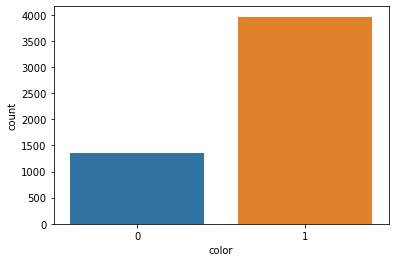

In [124]:
sns.countplot(data=wine_data, x="color")

Классы несбалансированы т.к. соотношение количество элементов сильно отличается, а значит будет использовать PR кривую.

# 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)


In [125]:
# выделим категориальные и числовые(количественные) признаки
numerical_columns = [i for i in wine_data.columns if wine_data[i].dtype.name != 'object']
categorial_columns = [i for i in wine_data.columns if wine_data[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
categorial:  ['color']


<AxesSubplot:>

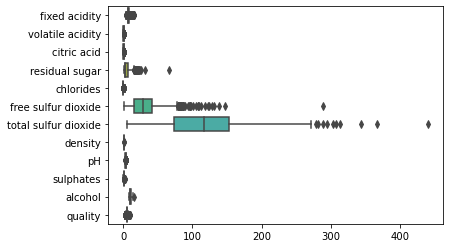

In [126]:
# Числовые признаки
wd_numerical = wine_data.drop(columns = 'color', axis = 1)
sns.boxplot(data = wd_numerical, orient = 'h')

#### Способ масштабирования: нормализация

<AxesSubplot:>

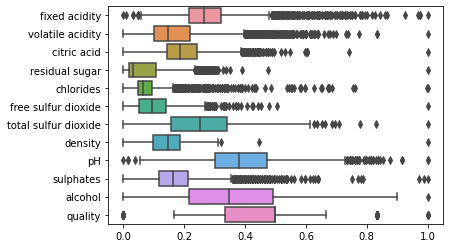

In [127]:
scaler = MinMaxScaler()
columns = wd_numerical.columns
wd_numerical[columns] = scaler.fit_transform(wd_numerical[columns])
sns.boxplot(data = wd_numerical, orient = 'h')

# 5. Выполните замену категориальных признаков.

In [128]:
for i in categorial_columns:
    print(i,': ', wine_data[i].unique())

color :  ['0' '1']


In [129]:
#nonbinary_columns = categorial_columns

#wine_data_nonbinary = pd.get_dummies(wine_data[nonbinary_columns])
#wine_data.drop(nonbinary_columns, axis=1, inplace=True)
#wine_data = pd.concat([wine_data_nonbinary, wine_data] , axis=1)

#print(wine_data.shape)
#wine_data.head()

# 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

<AxesSubplot:>

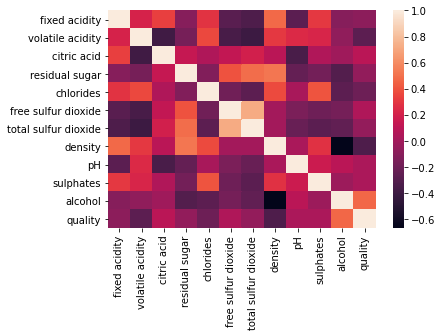

In [130]:
sns.heatmap(wine_data.corr())

In [131]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


# 7. Заполните пропущенные значения в данных.

In [132]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

Пропущенных значений нет

# 8. Решите поставленную задачу классификации в соответствии с заданием. 

- классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
- логический классификатор (бинарное решающее дерево).

In [133]:
x, y = wine_data.drop('color', axis = 1), wine_data['color']
#x = wd_numerical
#y = wine_data['color']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(4256, 12)
(1064, 12)


#### Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)

In [134]:
rnc = RadiusNeighborsClassifier()
params = {'radius': np.arange(200, 220)}



rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(x_train, y_train)

best_radius = rnc_grid.best_estimator_.radius
best_accuracy = rnc_grid.best_score_

rnc = RadiusNeighborsClassifier(radius=best_radius)
rnc.fit(x_train, y_train)
pred = rnc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred))
print('Best Accuracy:', best_accuracy, ' at radius:', best_radius)

Accuracy: 0.7424812030075187
Best Accuracy: 0.7450657332163761  at radius: 200


#### Логический классификатор (бинарное решающее дерево)

In [135]:
dtc = DecisionTreeClassifier()
params = {'max_depth': list(range(1, 12)), 'max_features': list(range(1, 12))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (x_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(x_train, y_train)
accuracy_score  = np.mean(y_test == dtc.predict(x_test))
print("Accuracy:",  accuracy_score)
print('Best:', best_score, "\n", 'at features number:', best_features, "\n", 'at depth:', best_depth)

Accuracy: 0.9840225563909775
Best: 0.9816727627811522 
 at features number: 8 
 at depth: 10


#### PR-кривая

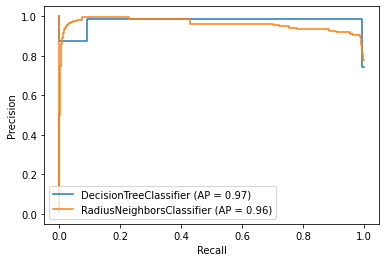

In [136]:
i = plot_precision_recall_curve(dtc, x_test, y_test)
g = plot_precision_recall_curve(rnc, x_test, y_test, ax = i.ax_)

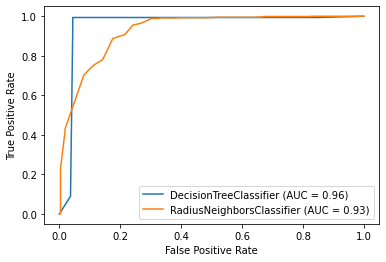

In [137]:
i = plot_roc_curve(dtc, x_test, y_test)
g = plot_roc_curve(rnc, x_test, y_test, ax = i.ax_)

# 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Логический классификатор имеет лучше показатели качества.